# Theoretical Questions

### Q1: 
What could be some issues if the distribution of the test data is significantly different than the distribution of the training data?

# ---- Your Answer ---- #
# Either train data set or test data set was collected with a biased method. Or duing training time, the training set was not able to give testing conditions. 

### Q2:

What are some differences you would expect in a model that minimizes squared error, versus a model that minimizes absolute error? 

In which case would each error metric be appropriate?

# ---- Your Answer ---- #
# A model that minimizes squared error eventually gives its mean while a model that minimizes absolute error eventually gives its median. The first model is more appropriate to obtain solution since its derivatives are continuous. The second one is more appropriate to avoid the influence of outliers. 

### Q3:

What error metric would you use to evaluate how good a binary classifier is?

What if the classes are imbalanced?

What if there are more than 2 groups?

# ---- Your Answer ---- #
# part1: Precision that computes how many selected items are relevant, and recall that computes how many relevant items are selected.
# part2: Simply get average of the precision and recall to get balanced accuracy. 
# part3: If there are more than 2 groups, compute the average of the metric for X1 vs X1 complement, X2 vs X2 complement, ... Xn vs Xn complement. 

### Q4: 

Why might it be preferable to include fewer predictors over many?


# ---- Your Answer ---- #
# If we use many predictors, it may overfit for training set with higher chance. 

# Programming Homework

### Question: Forest Cover Type Prediction

###### Focus: Multi-Class Classification

In the second part of this week's programming homework, you are tasked to develop a classification system to classify forest categories.

The interesting part of the dataset is that the predictors are all cartographic rather than remotely sensed data. 

Data is available at:  https://www.kaggle.com/c/forest-cover-type-prediction

* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data collected by the US Forest Service
* Build a classifier which can accurately classify the forest cover

Hints:
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively





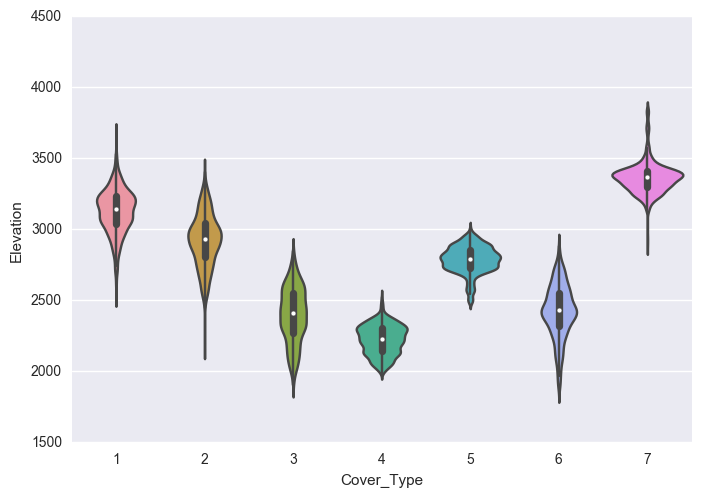

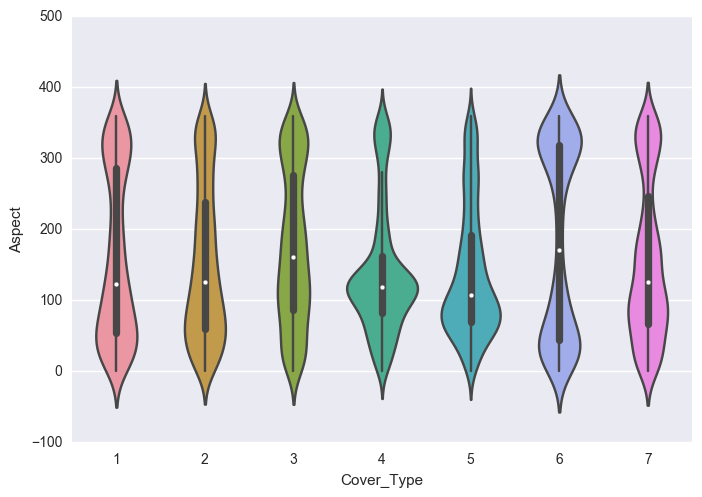

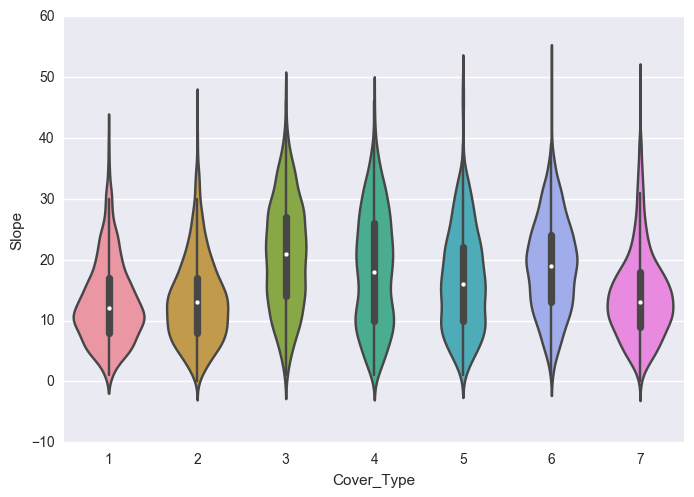

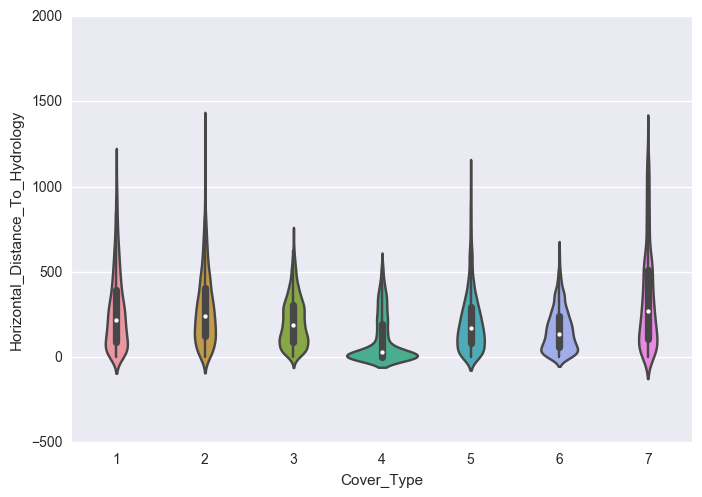

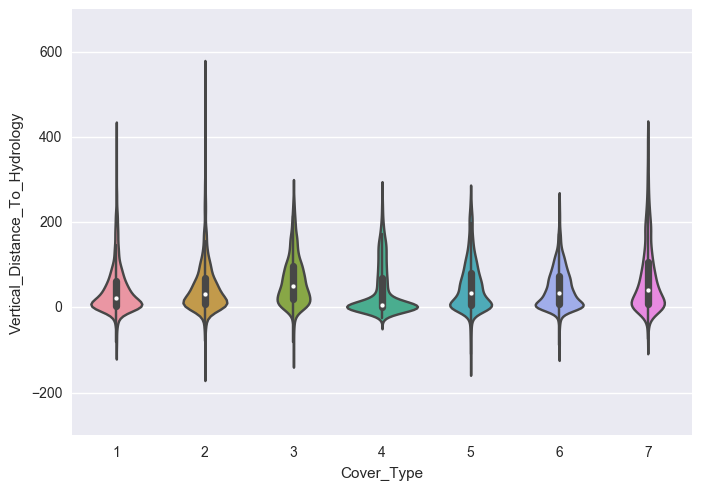

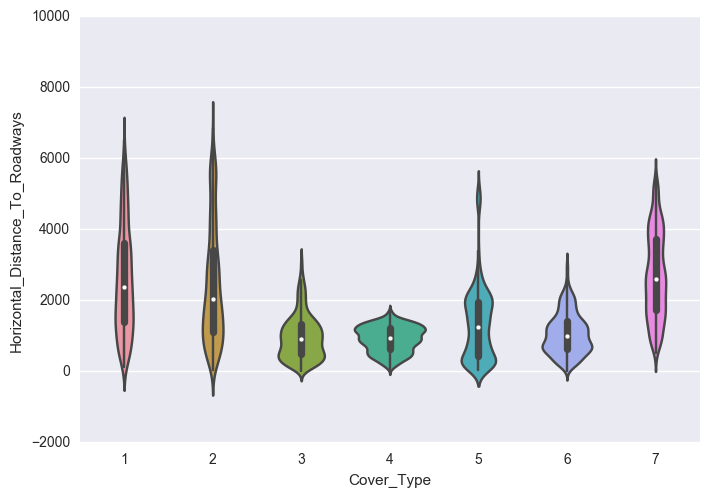

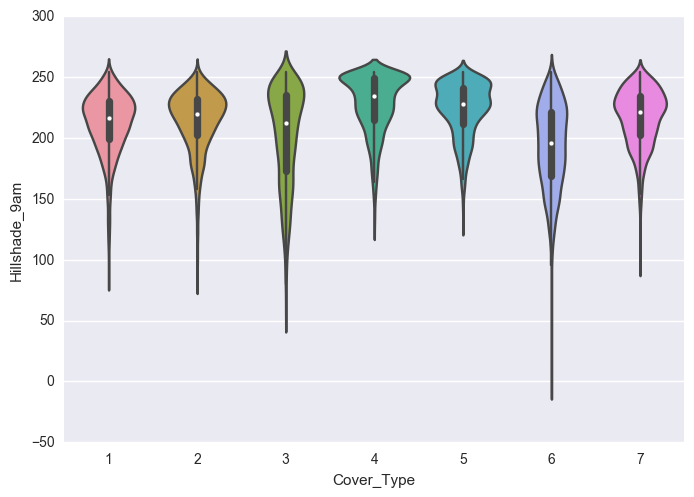

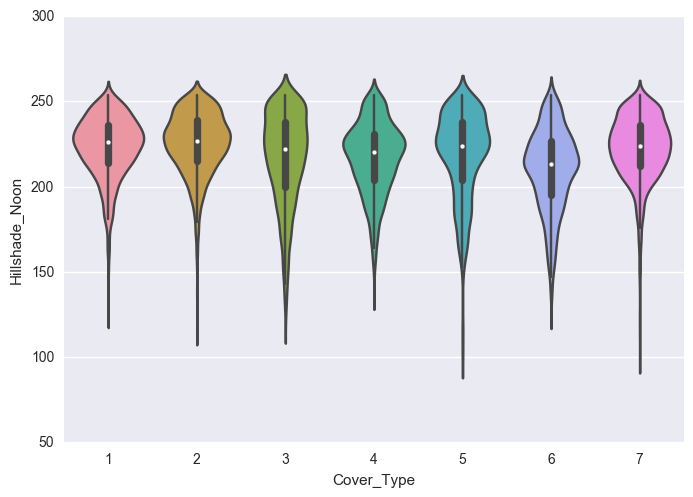

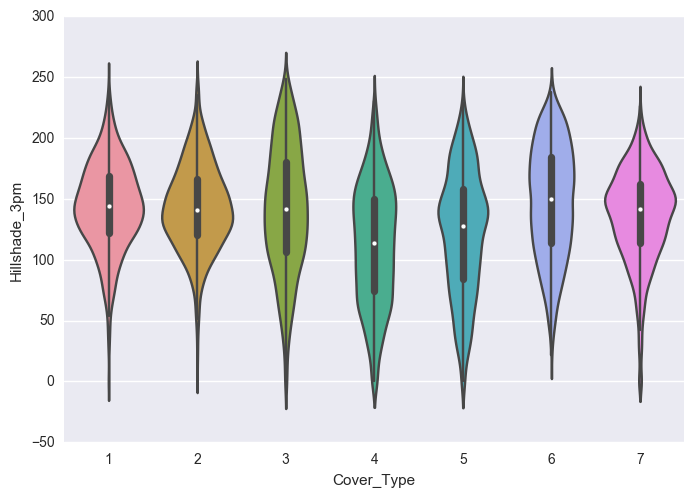

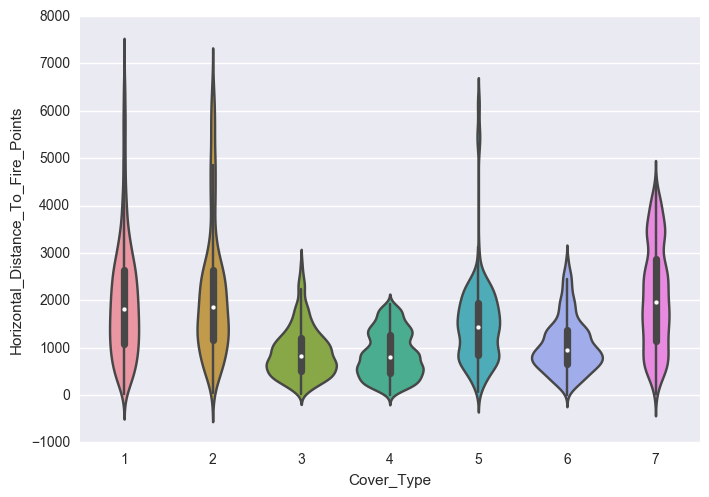

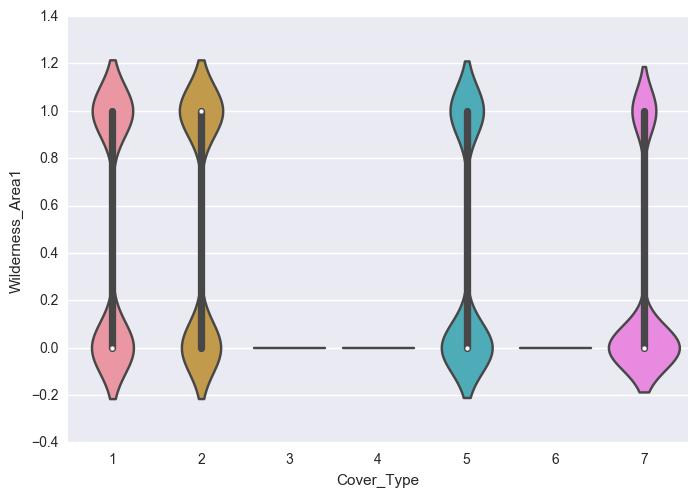

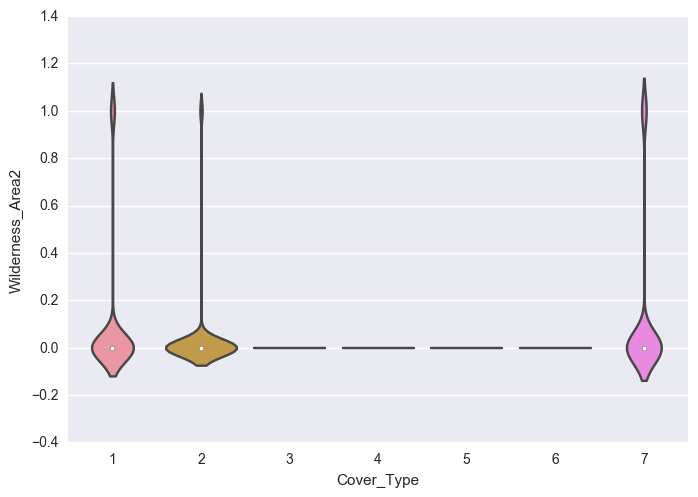

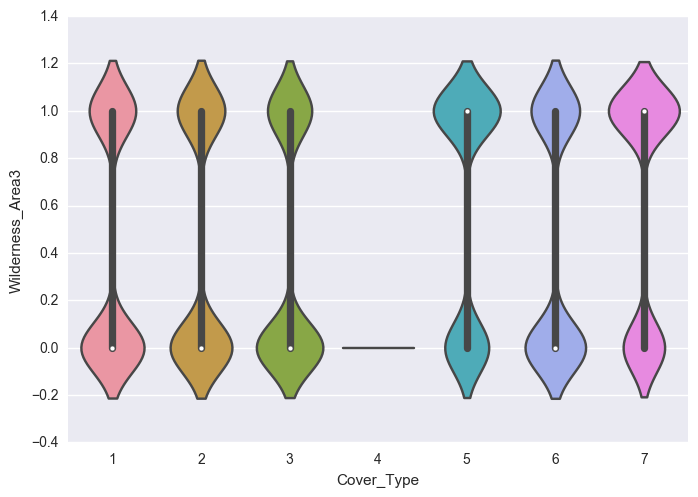

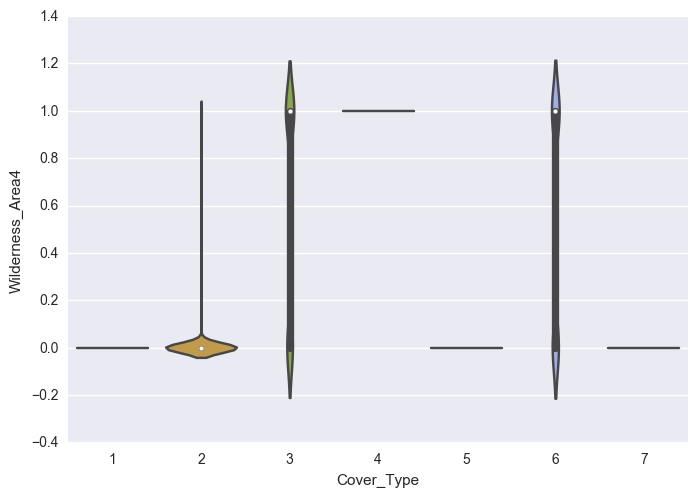

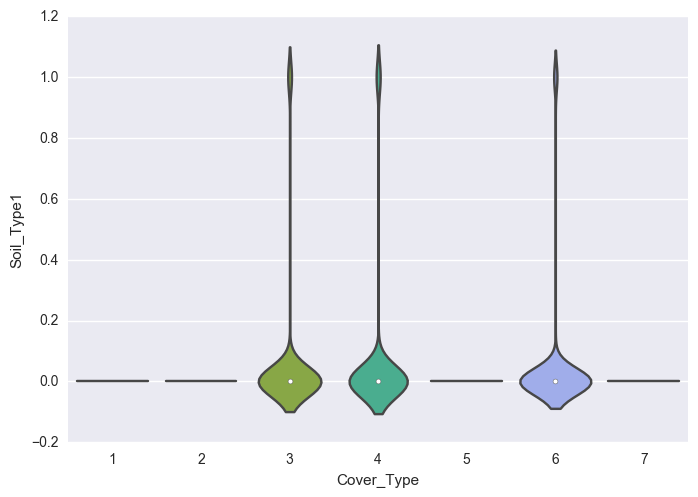

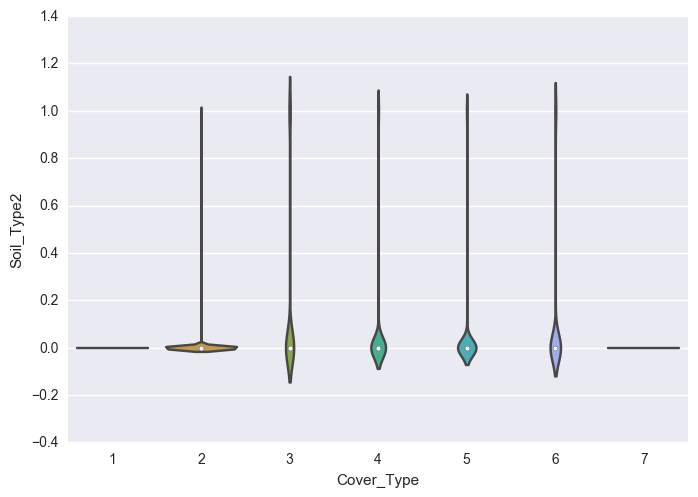

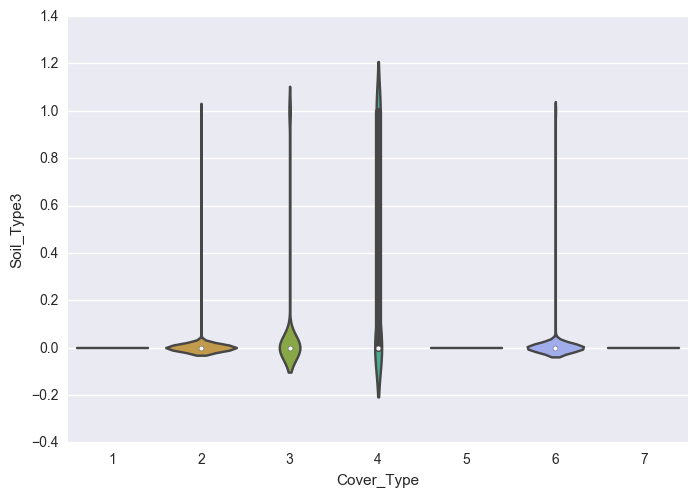

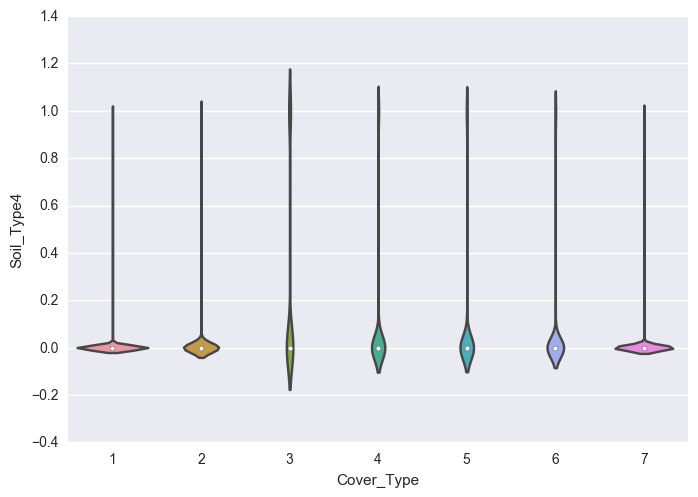

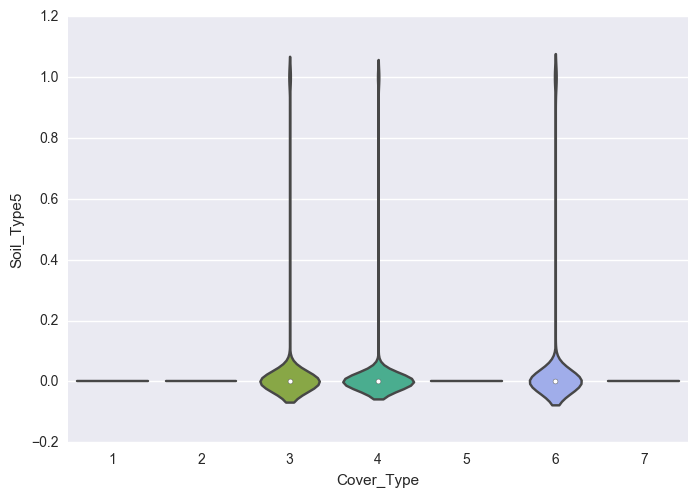

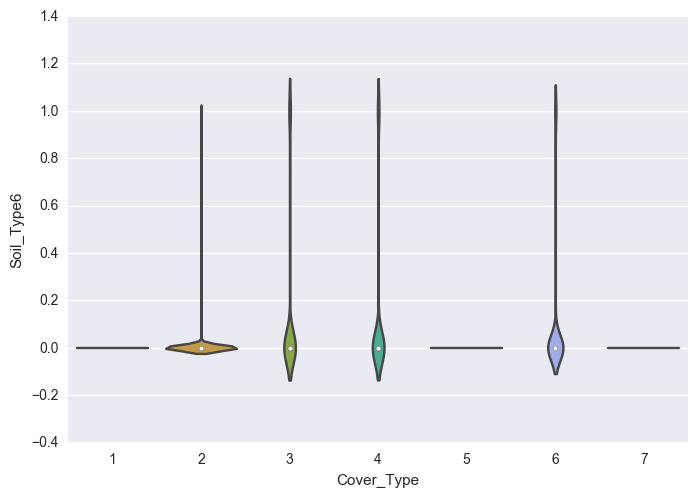

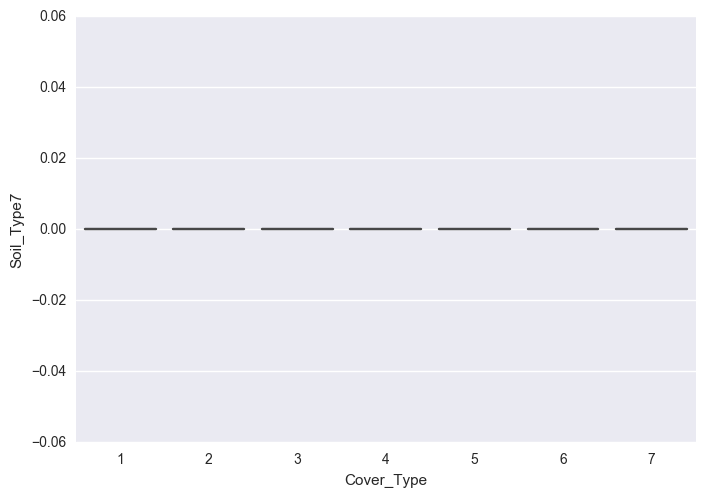

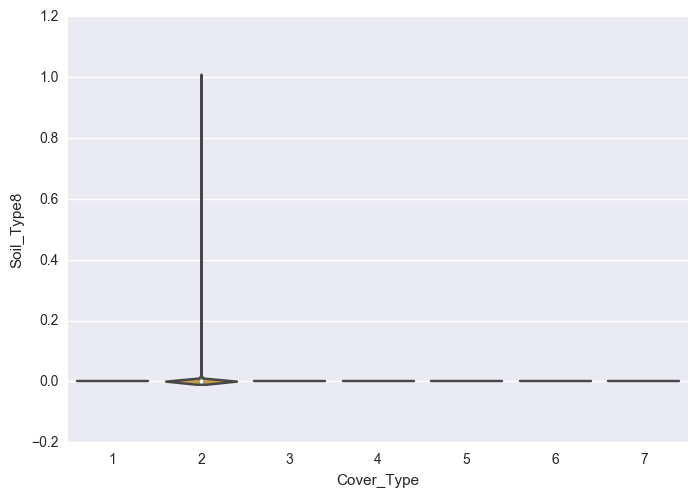

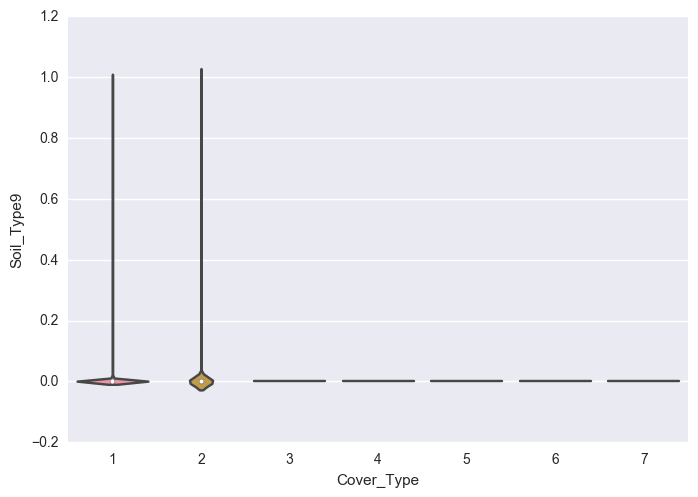

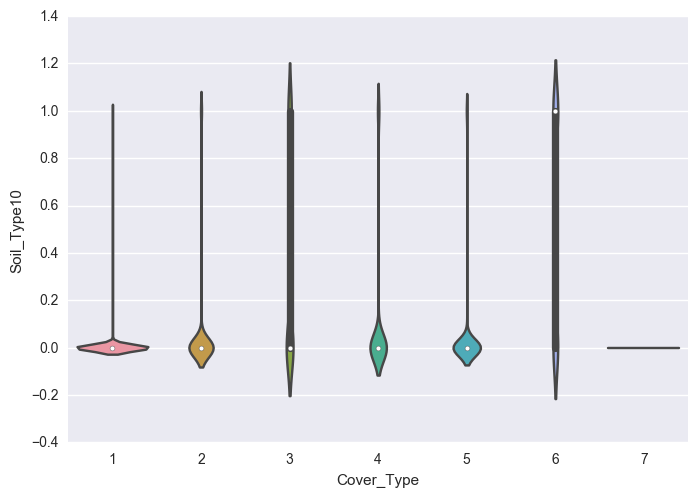

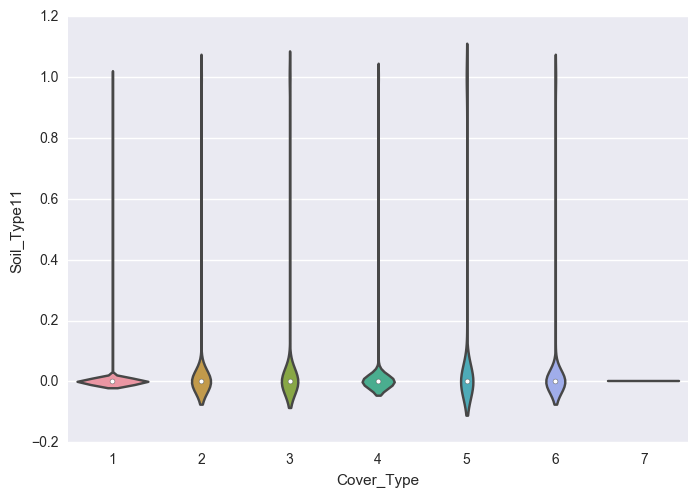

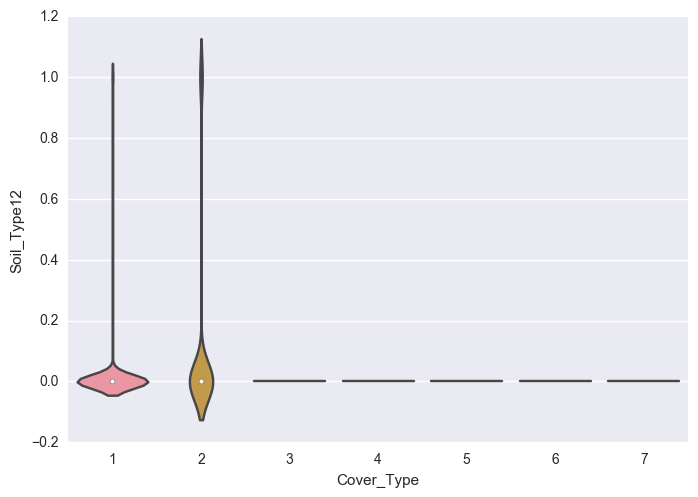

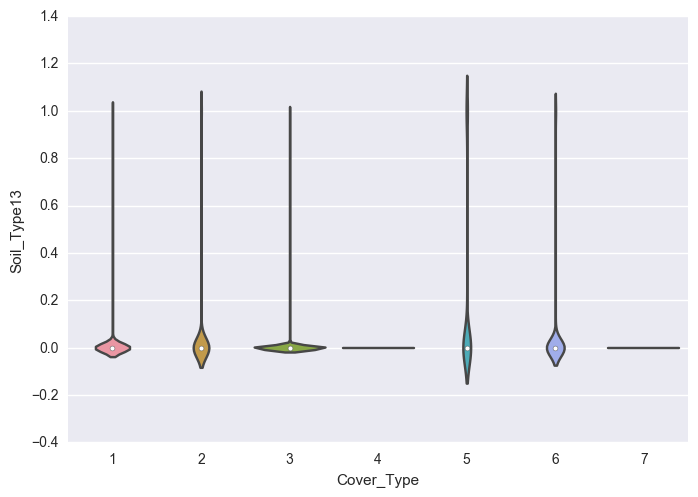

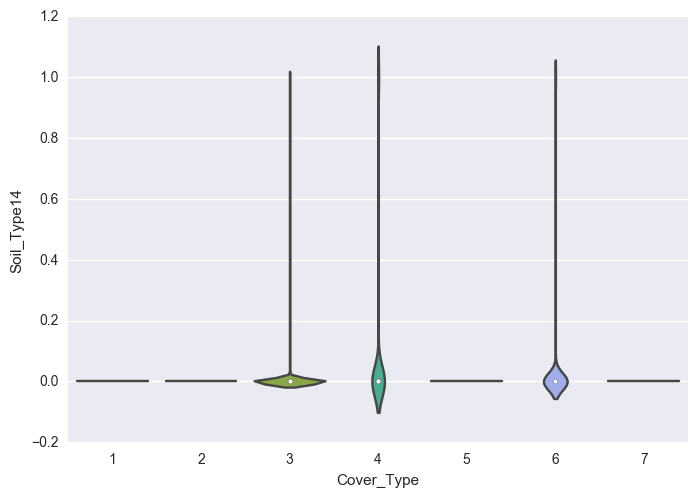

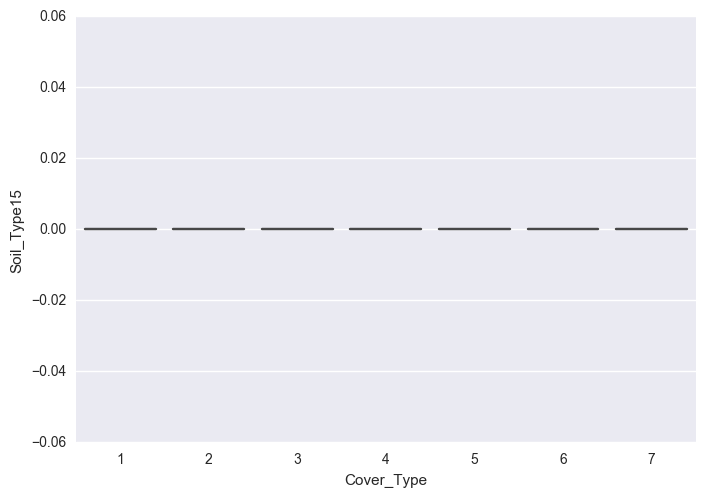

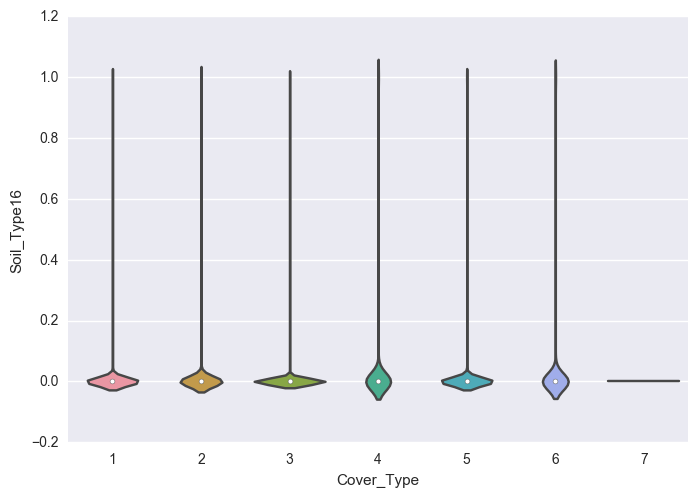

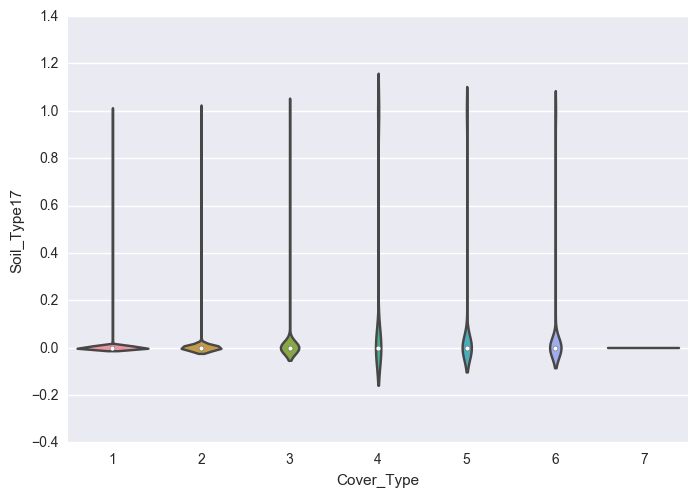

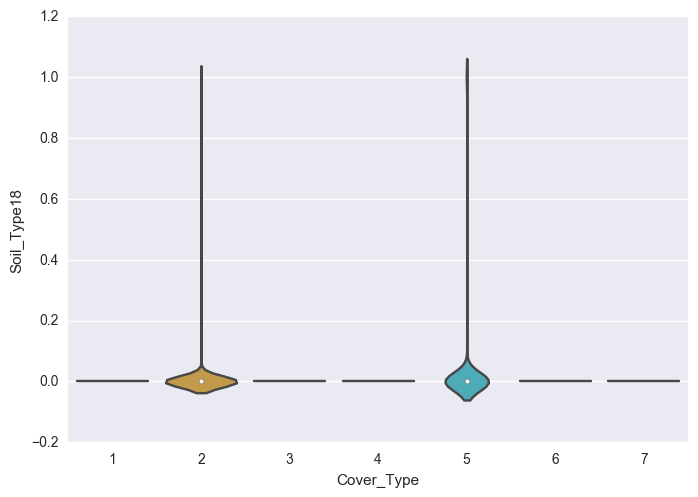

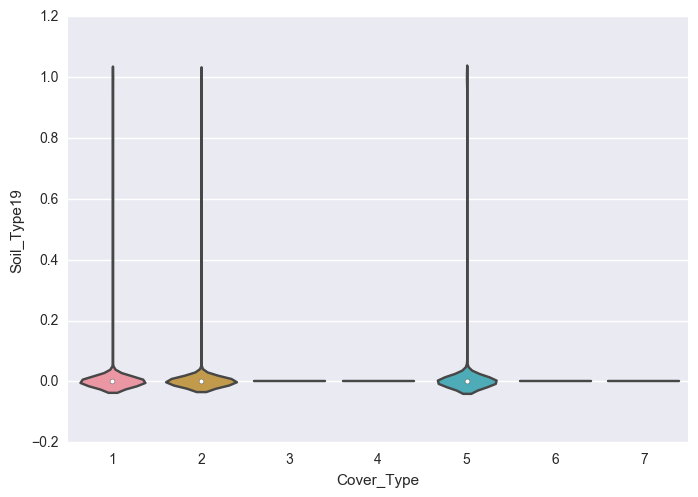

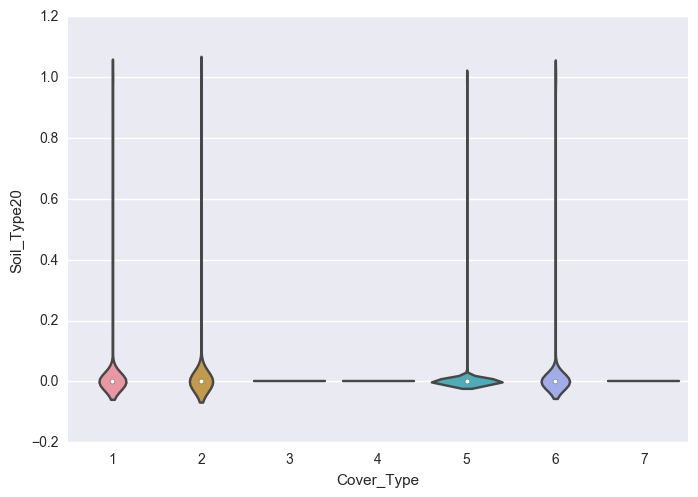

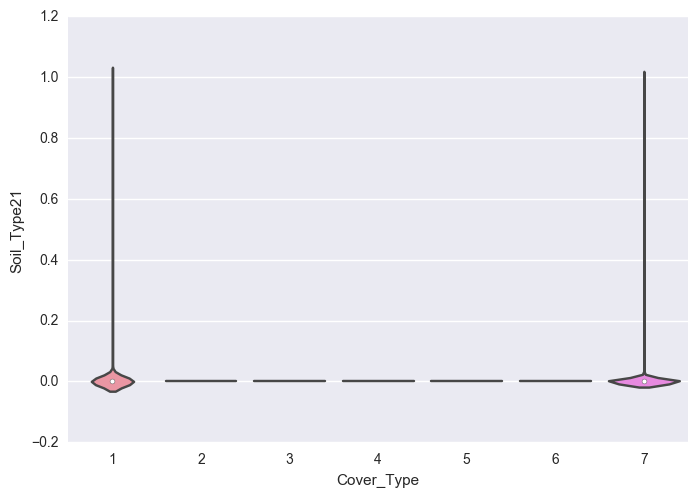

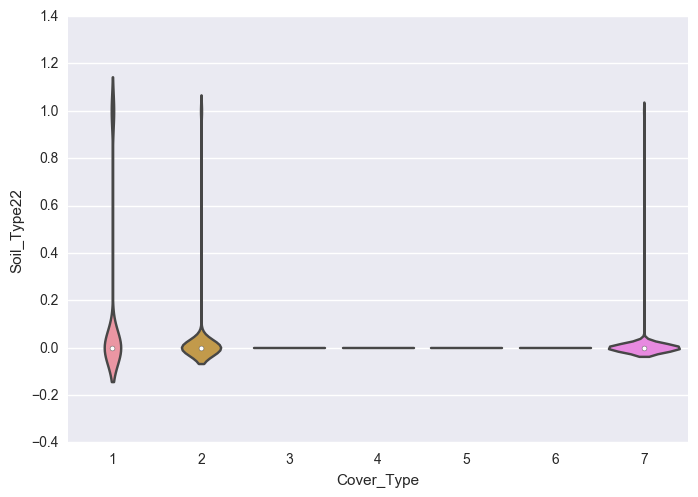

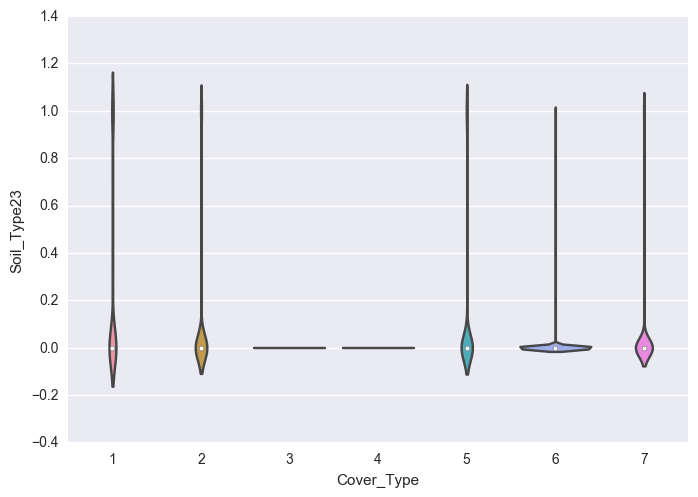

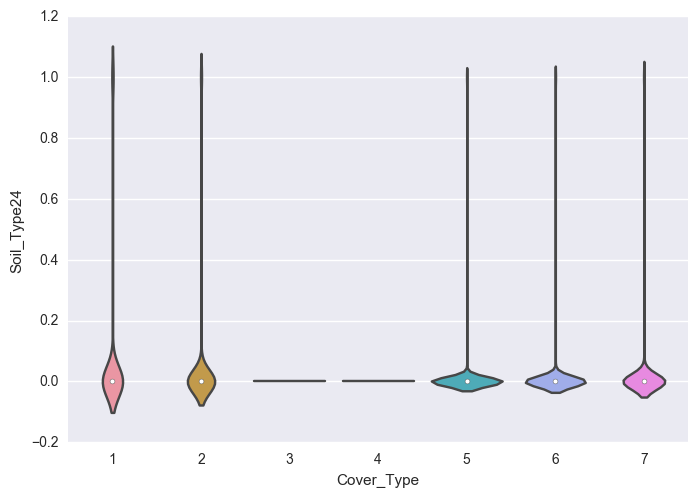

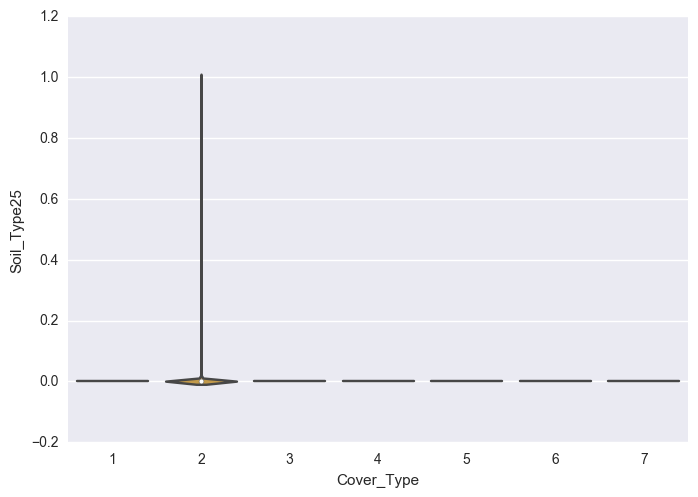

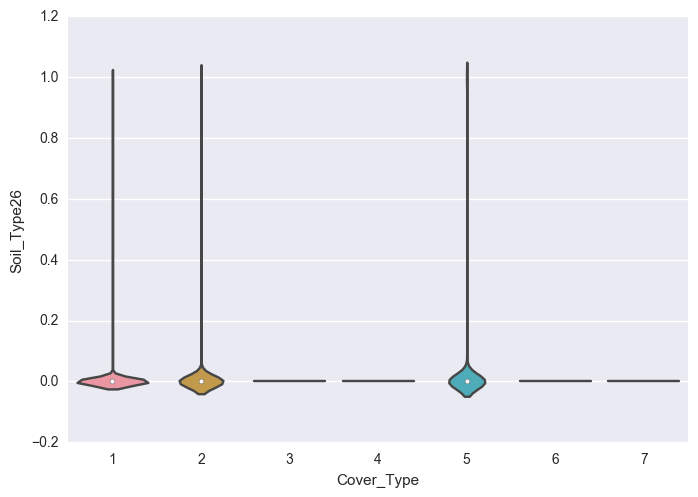

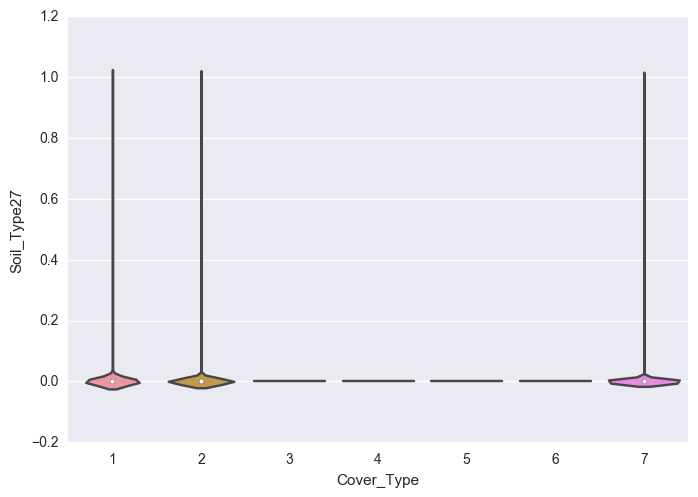

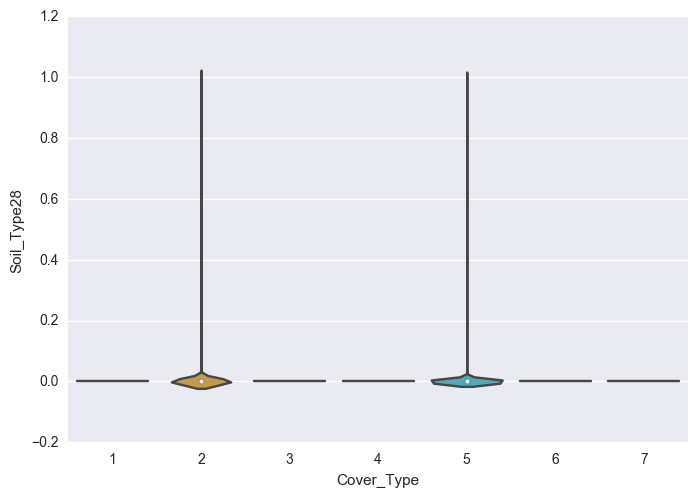

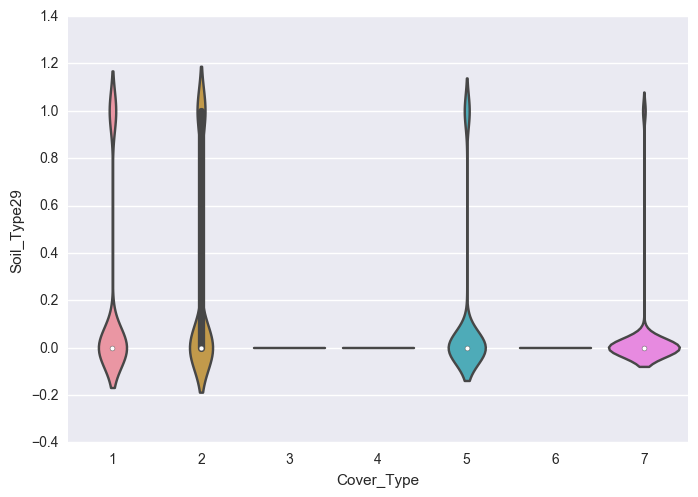

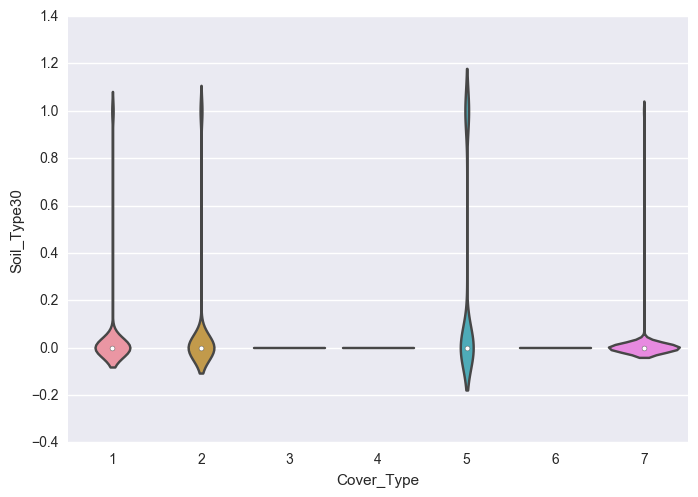

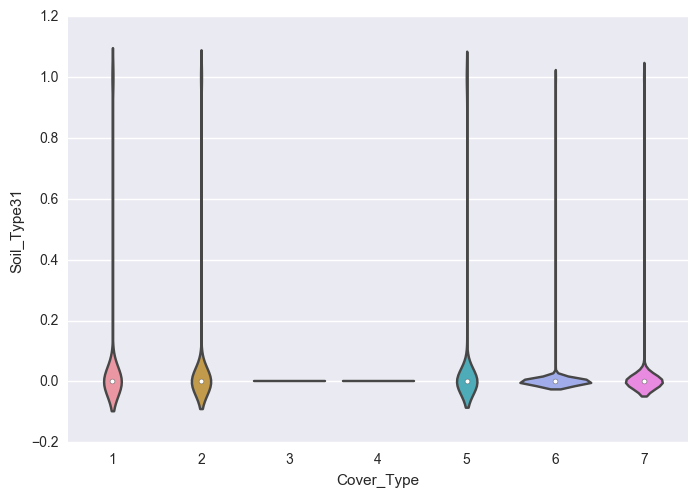

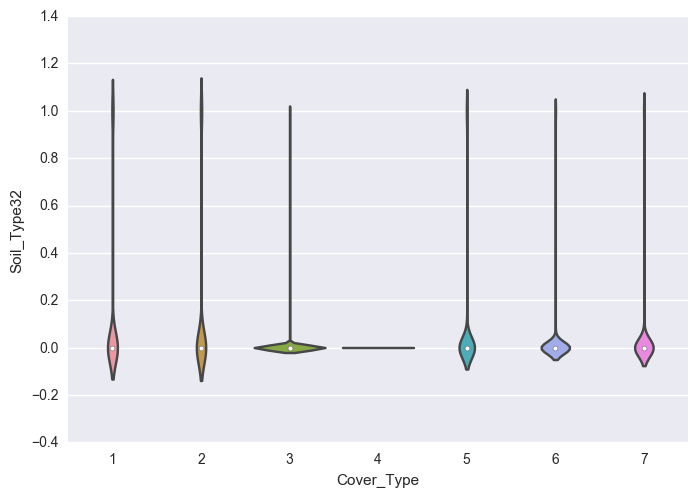

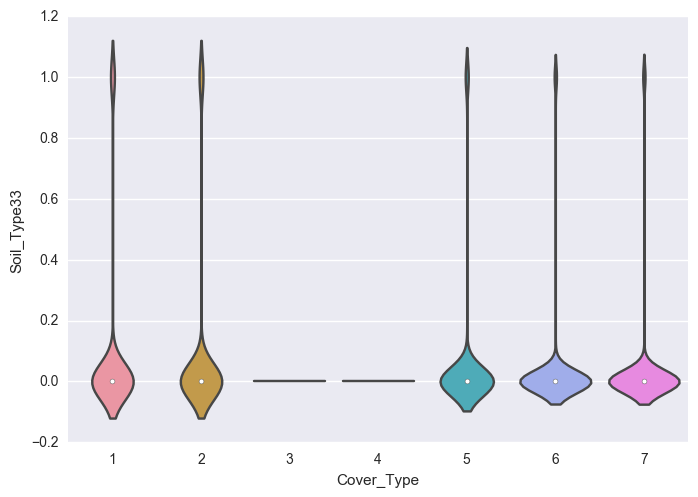

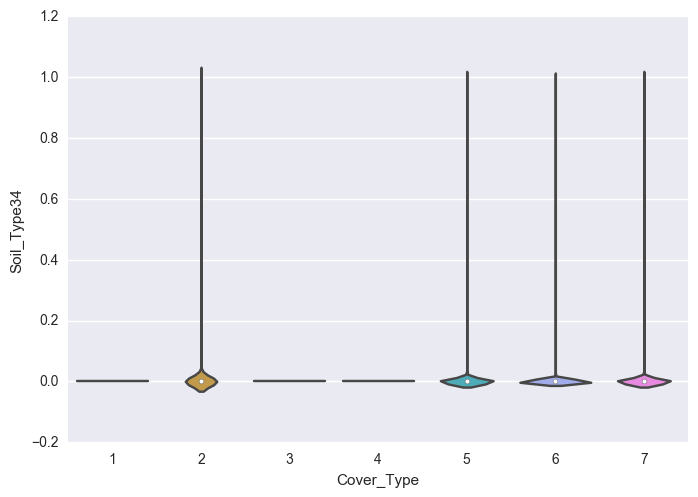

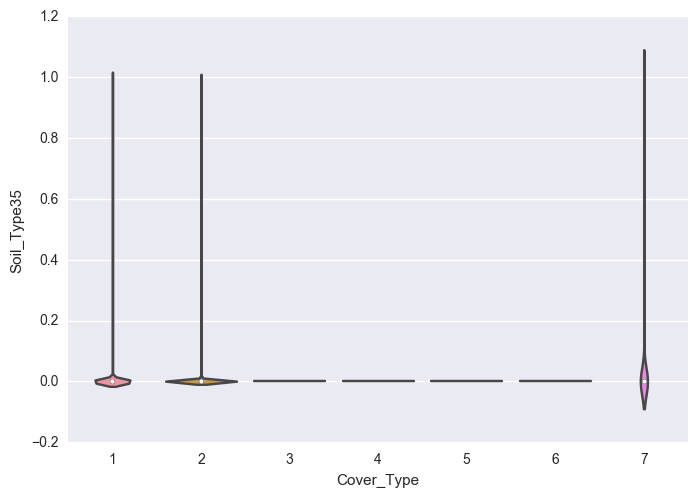

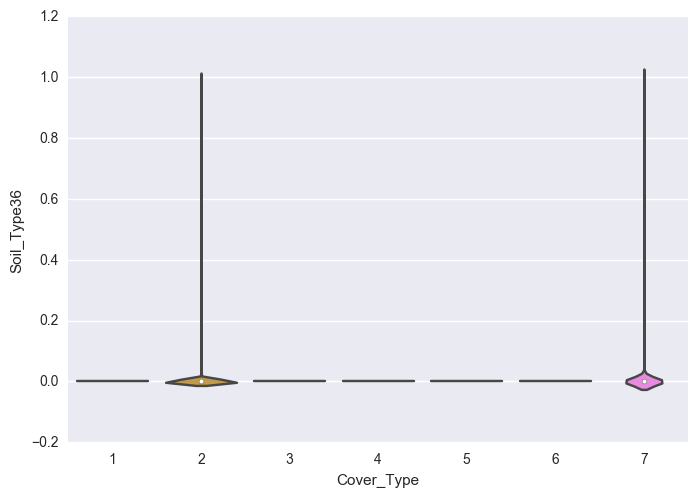

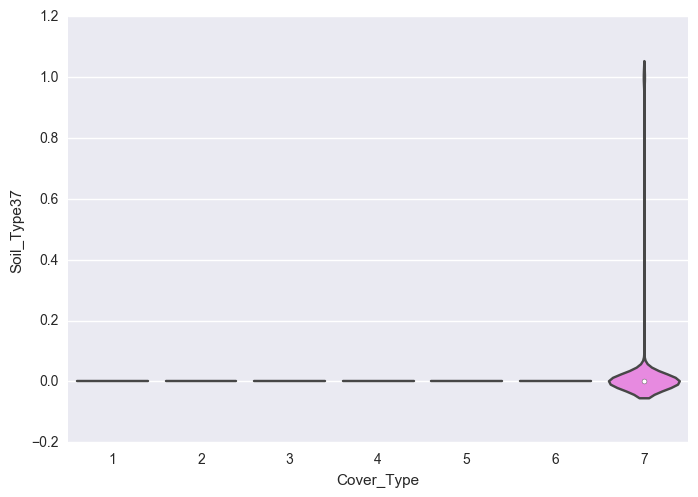

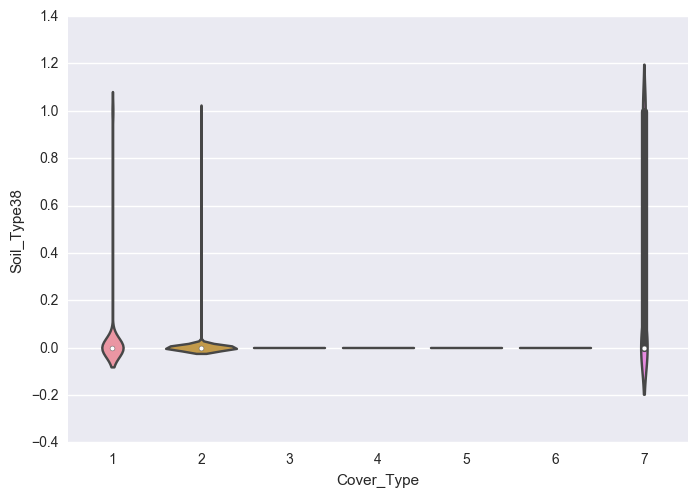

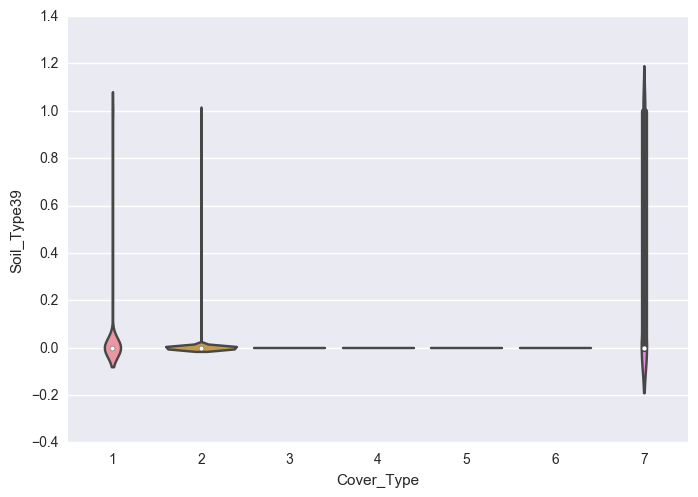

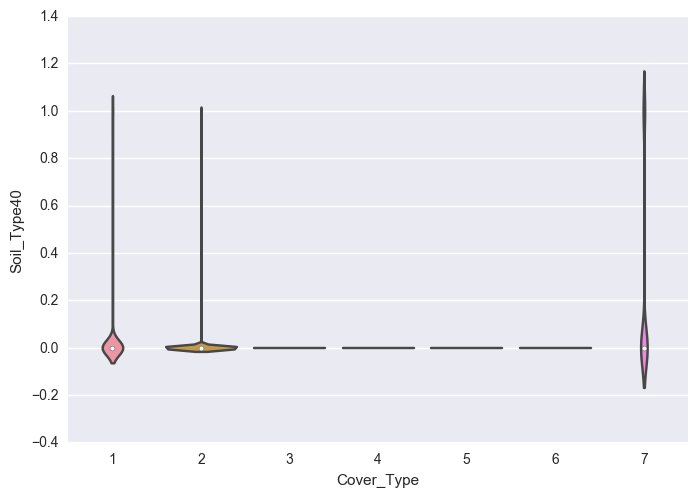

SVM score: 18.15
Perceptron score: 14.85


In [1]:
# ---- Your Answer ---- #
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
SAMPLE_SIZE = 1000 #Since using the full training data takes more than 4 hours, 
                    #used 1000 samples for training
#SAMPLE_SIZE = len(X_train)

df_train = pd.read_csv('hw5/train.csv')
df_train = df_train.drop('Id',axis=1)
Y_train = df_train['Cover_Type']
X_train = df_train.drop('Cover_Type',axis=1)
#SAMPLE_SIZE = len(X_train.rows())
#print len(X_train.row)
cols = X_train.columns
data_corr = X_train.corr()
threshold = 0.7
corr_list = []
size = len(X_train.columns)
#size = 10
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index
        
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    #print ("%s and %s = %.2f" % (cols[i],cols[j],v))
    X_train = X_train.drop(cols[i],axis=1)

drop_list = []
for col in X_train.columns:
    if X_train[col].std() == 0: 
        drop_list.append(col)
X_train = X_train.drop(drop_list,axis=1)

cols = df_train.columns
for i in range(0,len(cols)-1):
    sns.violinplot(data=df_train,x=cols[size],y=cols[0:size][i])  
    plt.show()

svc = svm.SVC(kernel='linear',C=1)
svc.fit(X_train[:SAMPLE_SIZE],Y_train[:SAMPLE_SIZE])
score = round(svc.score(X_train,Y_train)*100,2)
print "SVM score:",score

perceptron = Perceptron()
perceptron.fit(X_train[:SAMPLE_SIZE], Y_train[:SAMPLE_SIZE])
#Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print "Perceptron score:",acc_perceptron

## Prioject Homework

0. Create and turn in a "Product Requirement Document" that has these items in it.

1. Include 2 prioritized lists of requirements:

    * user requirements, mark items where you have low confidence
    * technical requirements, mark items where you have low confidence

2. Decide how you will validate user requirements which you are not sure about?

3. Decide how you will learn and test techcical challenges that you are not sure thatyou can achieve at this time.

4. Whiteboard or draw an architecture and/or data model based on what you know.  Take a picture of it and include it in the document

5. Make your list of what should be done in the next week, assign names to each item.

6. Insert your low tech demo picture (possibly modified) into this document

Turn in this document and also start a folder for your project and save it for your own review later.




## Extra Credit: Forecasting Bike Sharing Demand 

###### Focus: Regression and Feature Engineering

In this week's programming homework, you are tasked to develop a forecasting system for the use of a city bikeshare system. 

The question is based on a for-knowledge competition hosted on Kaggle: 
Reference: Fanaee-T, Hadi, and Gamo, Joao, Event labeling combining detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

Data is available at: https://www.kaggle.com/c/bike-sharing-demand

3 files are provided:
* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data generated by bike sharing systems
* Predict the number of total rentals in each time period during the test phase

Hints: 
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively


